In [1]:
import importlib
import DTS_processing_functions
importlib.reload(DTS_processing_functions)
from DTS_processing_functions import *
from tqdm import tqdm

In [69]:
spy =  3.154e+7 
k_diff = 1.09e-6 * spy

tmin = 1923
tmax = 2023
num_steps = 101
depth=20
nz=21

## Fig 1 from Mareschal and Beltrami (1992)

In [122]:
t = np.array([10,30,100,300])
z = np.linspace(0.001,500,501)


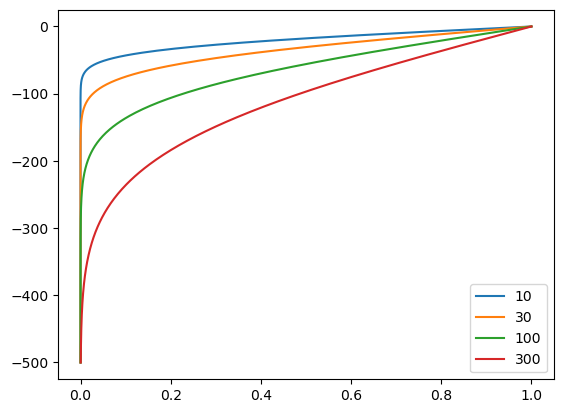

In [124]:
fig,ax=plt.subplots()
for i in t:
    T_z = np.zeros(len(z))
    for k,j in enumerate(z):
        T = math.erfc(j/ (2*np.sqrt(k_diff*i)))
        T_z[k]=T
    ax.plot(T_z,z*-1, label=str(i))
plt.legend()

## A_jk in Equation 6  from Mareschal and Beltrami (1992)

In [150]:
t = np.linspace(0.0001,500,501)

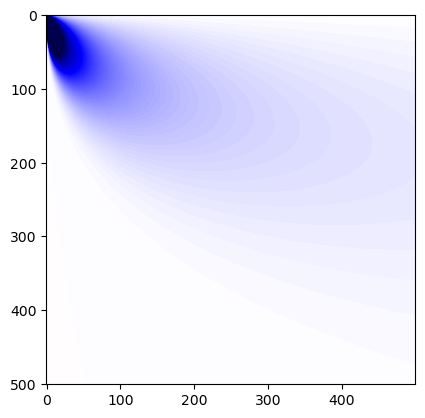

In [189]:
# fig,ax = plt.subplots()
A_jk = np.zeros((len(z),len(t)-1))
for i in range(len(t)-1):
    T_z = np.zeros(len(z))
    for k,j in enumerate(z):
        T = math.erfc(j/ (2*np.sqrt(k_diff*t[i]))) - math.erfc(j/ (2*np.sqrt(k_diff*t[i+1])))
        T_z[k]=T
#     ax.plot(T_z, z*-1)
    A_jk[:,i]=T_z
fig,ax = plt.subplots()
v=0.01
ax.imshow(A_jk,cmap='seismic', vmin=-v,vmax=v)

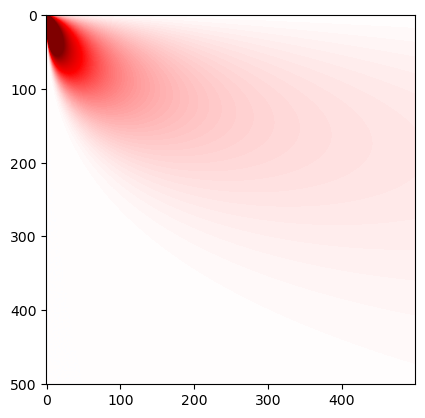

In [192]:
### Error functions flipped around test

# fig,ax = plt.subplots()
A_jk = np.zeros((len(z),len(t)-1))
for i in range(len(t)-1):
    T_z = np.zeros(len(z))
    for k,j in enumerate(z):
        T =  math.erfc(j/ (2*np.sqrt(k_diff*t[i+1]))) - math.erfc(j/ (2*np.sqrt(k_diff*t[i])))
        T_z[k]=T
#     ax.plot(T_z, z*-1)
    A_jk[:,i]=T_z
    
fig,ax = plt.subplots()
v=0.01
ax.imshow(A_jk,cmap='seismic', vmin=-v,vmax=v)

## Creat a synthetic temeprature signal

Text(0.5, 0, 'Years Before Present')

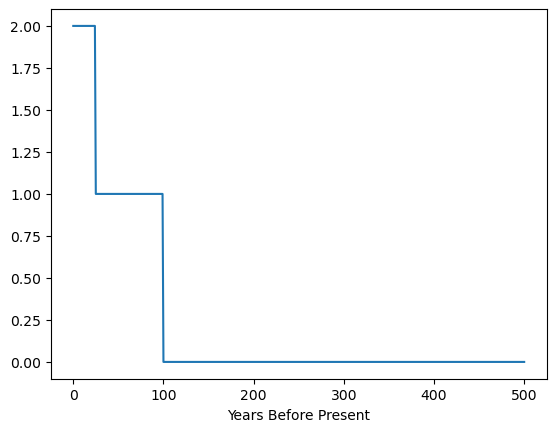

In [199]:
syn_temp = np.zeros(len(t))
stop = int(.05*len(t))
syn_temp[:stop] = 2
syn_temp[stop:4*stop] = 1
fig,ax = plt.subplots()
ax.plot(t,syn_temp)
ax.set_xlabel('Years Before Present')

## Do the inversion using SVD and then plot

Text(0.5, 0, 'Years before present')

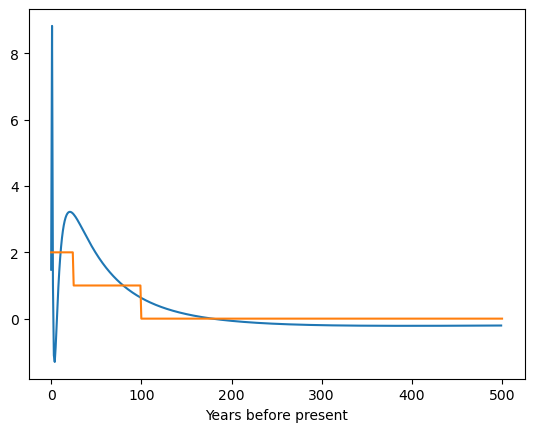

In [203]:
inversed = inverser_SVD(A_jk,syn_temp,p=5)

fig, ax = plt.subplots()
ax.plot(t[:-1],inversed[0])
ax.plot(t,syn_temp)
ax.set_xlabel('Years before present')